In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hsx_movie_master.csv')
df2 = pd.read_csv('hsx_movie_prices.csv')
df33 = pd.read_csv('boxofficemojo_daily_boxoffice.csv')

In [3]:
unique_identifiers = df2['identifier'].unique()

In [4]:
#print(unique_identifiers)

In [5]:
identifier_name = '1917'
filtered_df = df[df['identifier'] == identifier_name]
#print(filtered_df)
df3 = pd.read_csv('boxofficemojo_releases.csv')
title_name = filtered_df['title']
fdf3 = df3[df3['title'] == title_name.values[0]]
#print(fdf3)
df4 = pd.read_csv('boxofficemojo_daily_boxoffice.csv')
ide_name2 = fdf3['identifier']
fdf4 = df4[df4['identifier'] == ide_name2.values[0]]
print(fdf4)

         bo_date    identifier  daily_domestic_gross  daily_theater_count  \
2016  2020-03-19  rl2969994753                   225                766.0   
2047  2020-03-18  rl2969994753                   740                766.0   
2085  2020-03-17  rl2969994753                  5860                766.0   
2126  2020-03-16  rl2969994753                 26785                766.0   
2172  2020-03-15  rl2969994753                 92380                766.0   
...          ...           ...                   ...                  ...   
6082  2019-12-29  rl2969994753                191895                 11.0   
6137  2019-12-28  rl2969994753                203219                 11.0   
6190  2019-12-27  rl2969994753                181102                 11.0   
6244  2019-12-26  rl2969994753                186837                 11.0   
6298  2019-12-25  rl2969994753                251262                 11.0   

                 retrieved_at                     inserted_at  
2016  2020-

In [6]:
fdf2 = df2[df2['identifier'] == '1917']
#print(fdf2)

In [7]:
dates = ['2020-02-03', '2020-02-02', '2020-02-01', '2020-01-31', '2020-01-30', '2020-01-29', '2020-01-28', '2020-01-27', '2020-01-26', '2020-01-25', '2020-01-24', '2020-01-23', '2020-01-22', '2020-01-21', '2020-01-20', '2020-01-19', '2020-01-18', '2020-01-17', '2020-01-16', '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-12', '2020-01-11', '2020-01-10', '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06', '2020-01-05', '2020-01-04', '2020-01-03', '2020-01-02', '2020-01-01']
cmb_df = pd.DataFrame()
cmb_df2 = pd.DataFrame()

In [8]:
# Stock price for movie 1917
for date in dates:
  df_date = fdf2[fdf2['retrieved_at'].str.contains(date)]
  first_date = df_date.iloc[0]

  cmb_df = pd.concat([cmb_df, first_date.to_frame().T])

print(cmb_df)

      identifier   price shares_long shares_short trading_vol  \
46305       1917  117.44   108700160    5726576.0   1229089.0   
46329       1917  118.55   109095660    5626576.0   1329999.0   
46353       1917  117.68   108904105    5836604.0   1026200.0   
46377       1917   119.2   109509905    5782604.0    896561.0   
46402       1917  119.18   109770343    5995602.0    676127.0   
46426       1917  119.15   110026917    6060601.0   1069001.0   
46450       1917  119.73   110287977    6041600.0    772060.0   
46475       1917   118.7   110385937    6156600.0   1244054.0   
46499       1917  117.87   110888241    6449448.0   2007998.0   
46522       1917   115.9   110588141    6992347.0   1063000.0   
46546       1917   114.1   110339691    7402356.0   1568701.0   
46570       1917  112.86   110659842    7597206.0   2337952.0   
46594       1917  116.27   112129823    7225154.0   1270676.0   
46618       1917  118.17   112746424    6918328.0   2569168.0   
46642       1917  120.37 

In [9]:
fdf3 = df33[df33['identifier'] == 'rl2969994753']
#print(fdf3)

In [10]:
# Box office for movie 1917
for date in dates:
  df_date2 = fdf3[fdf3['bo_date'].str.contains(date)]
  first_date2 = df_date2.iloc[0]

  cmb_df2 = pd.concat([cmb_df2, first_date2.to_frame().T])

print(cmb_df2)

         bo_date    identifier daily_domestic_gross daily_theater_count  \
4288  2020-02-03  rl2969994753               904455              3987.0   
4337  2020-02-02  rl2969994753              1430940              3987.0   
4385  2020-02-01  rl2969994753              5270120              3987.0   
4434  2020-01-31  rl2969994753              2796175              3987.0   
4482  2020-01-30  rl2969994753              1241435              3937.0   
4530  2020-01-29  rl2969994753              1252900              3937.0   
4578  2020-01-28  rl2969994753              1912585              3937.0   
4627  2020-01-27  rl2969994753              1179580              3937.0   
4678  2020-01-26  rl2969994753              4610120              3937.0   
4725  2020-01-25  rl2969994753              7288305              3937.0   
4773  2020-01-24  rl2969994753              4018155              3937.0   
4822  2020-01-23  rl2969994753              1772655              3612.0   
4871  2020-01-22  rl29699

In [11]:
a = cmb_df['price'].to_numpy()
b = cmb_df2['daily_domestic_gross'].to_numpy()

In [15]:
a_nrm = (a - np.mean(a)) / np.std(a) / len(a)
b_nrm = (b - np.mean(b)) / np.std(b)

In [16]:
corr = np.correlate(a_nrm, b_nrm, mode='full')
print(corr)

[-0.0188287537549149 -0.039880122101536485 -0.059294167924398525
 -0.08086539961290116 -0.10273651213854385 -0.1250125073673849
 -0.14821467669037094 -0.16978551385861157 -0.19017667561516177
 -0.12746587639133297 -0.0553406408039755 -0.012955625066407251
 -0.003295236122472258 0.013655464040166567 0.016502095793259355
 0.020883873991104196 0.035537900296955985 0.06553128441457065
 0.06866134219112624 0.05455609453661074 0.033816434870729044
 0.039902178071800666 0.07515512976370158 0.13971211118852275
 0.1866814854855339 0.2356152288261263 0.2530020785258916
 0.2670886565222419 0.2905302873156458 0.3291913871008492
 0.37853720222416753 0.3949241749825502 0.3656937051692719
 0.3171473251466278 0.20978309927059025 0.08825298663398545
 0.007076867794899161 -0.056481186501361996 -0.15896533617669065
 -0.2804795416197465 -0.36987487003998926 -0.451027866235031
 -0.5476791549924274 -0.4110522036718534 -0.26680232498957385
 -0.19838880890033483 -0.22829828457659254 -0.20494592648817225
 -0.2

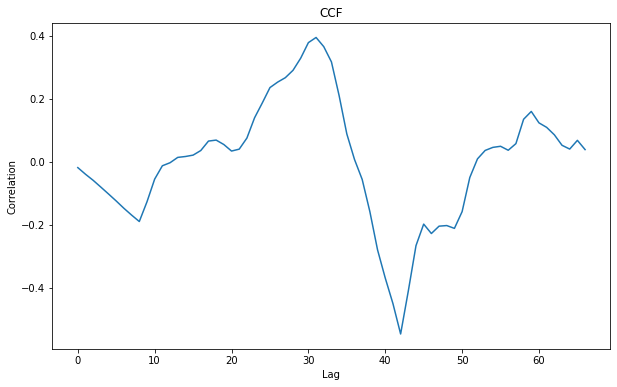

In [17]:
fig = plt.figure(figsize=[10, 6])
plt.plot(corr)
plt.title('CCF')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()